In [17]:
# Day 77 – PCA Implementation

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D 

# ---------------------------
# Load and standardize data
# ---------------------------
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_scaled = StandardScaler().fit_transform(X)

In [18]:
# ---------------------------
# PCA to 2 components
# ---------------------------
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

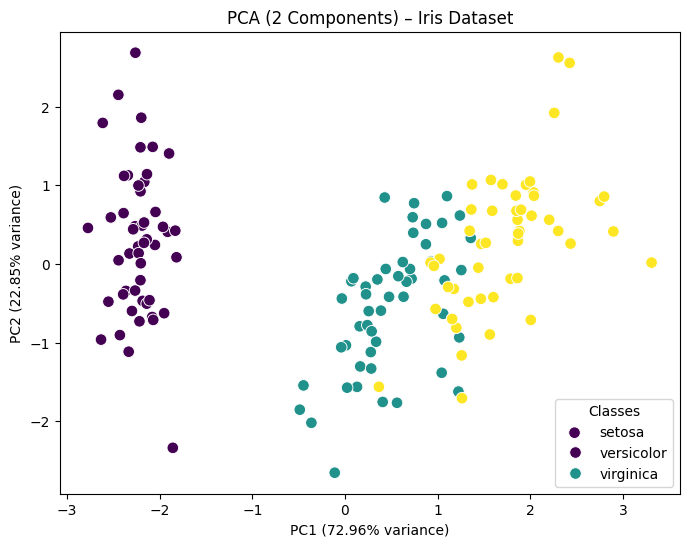

In [19]:
# ---------------------------
# 2D Visualization
# ---------------------------
fig_2d, ax_2d = plt.subplots(figsize=(8, 6)) # Use fig, ax convention for better control
# Create the scatter plot using seaborn
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="viridis", s=70, ax=ax_2d)
ax_2d.set_title("PCA (2 Components) – Iris Dataset")
# Label axes with explained variance ratio
ax_2d.set_xlabel(f"PC1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}% variance)")
ax_2d.set_ylabel(f"PC2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}% variance)")
# Apply custom labels to the legend
ax_2d.legend(title="Classes", labels=target_names) # Use ax.legend for better control
plt.show()

In [20]:
# ---------------------------
# PCA to 3 components
# ---------------------------
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

C:\Users\AMAN\AppData\Local\Temp\ipykernel_13208\1437084916.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis")


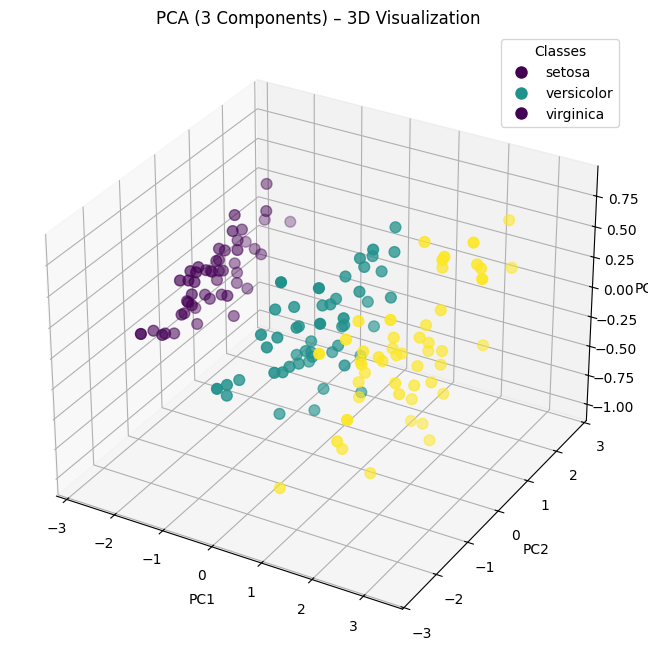

In [21]:
# ---------------------------
# 3D Visualization
# ---------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Create the 3D scatter plot
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=y, cmap="viridis", s=60)

ax.set_title("PCA (3 Components) – 3D Visualization")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

cmap = plt.cm.get_cmap("viridis")
target_colors = [cmap(i) for i in [0, 1/2, 1]]

legend_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=target_colors[i], markersize=10)
    for i in range(len(target_names))
]
ax.legend(legend_handles, target_names, title="Classes")
plt.show()

In [22]:

# ---------------------------
# Explained variance
# ---------------------------
print("Explained Variance Ratios:", pca_2d.explained_variance_ratio_)
print("Total variance captured (2 PCs):", pca_2d.explained_variance_ratio_.sum())

Explained Variance Ratios: [0.72962445 0.22850762]
Total variance captured (2 PCs): 0.9581320720000166


In [23]:
print("Explained Variance Ratios (3 PCs):", pca_3d.explained_variance_ratio_)
print("Total variance captured (3 PCs):", pca_3d.explained_variance_ratio_.sum())

Explained Variance Ratios (3 PCs): [0.72962445 0.22850762 0.03668922]
Total variance captured (3 PCs): 0.9948212908928453
